## Learning Vector Quantization (LVQ)

In [11]:
import numpy as np
import neurolab as nl

In [12]:
# Create train samples (data & labels)
input = np.array([[-3, 0], [-2, 1], [-2, -1], [0, 2], [0, 1], 
                  [0, -1], [0, -2], [2, 1], [2, -1], [3, 0]])
target = np.array([[1, 0], [1, 0], [1, 0], [0, 1], [0, 1], 
                   [0, 1], [0, 1], [1, 0], [1, 0], [1, 0]])

In [13]:
# Create network with 2 layers:4 neurons in input layer (Competitive)
# and 2 neurons in output layer (linear)

# 1st arg - list of list, the outer list is the number of input neurons,
# inner lists must contain 2 elements: min and max
# 4 - Number of neurons in input layer
# [.6, .4] - % weightage of each output, sum(pc) == 1
net = nl.net.newlvq(nl.tool.minmax(input), 4, [.6, .4])
print(nl.tool.minmax(input)) # ((-3.0, 3.0), (-2.0, 2.0))

# Train the Linear Vector Quantization (LVQ) neural network
error = net.train(input, target, epochs=1000, goal=-1)

((-3.0, 3.0), (-2.0, 2.0))
Epoch: 100; Error: 0.0;
Epoch: 200; Error: 0.0;
Epoch: 300; Error: 0.0;
Epoch: 400; Error: 0.0;
Epoch: 500; Error: 0.0;
Epoch: 600; Error: 0.0;
Epoch: 700; Error: 0.0;
Epoch: 800; Error: 0.0;
Epoch: 900; Error: 0.0;
Epoch: 1000; Error: 0.0;
The maximum number of train epochs is reached


In [14]:
# Create the input grid

# np.meshgrid() - Return coordinate matrices from coordinate vectors.
# arguments are 1-D arrays representing the coordinates of a grid.
xx, yy = np.meshgrid(np.arange(-3, 3.4, 0.2), 
                     np.arange(-3, 3.4, 0.2))
print(xx)
print(yy)

[[-3.  -2.8 -2.6 ...  2.8  3.   3.2]
 [-3.  -2.8 -2.6 ...  2.8  3.   3.2]
 [-3.  -2.8 -2.6 ...  2.8  3.   3.2]
 ...
 [-3.  -2.8 -2.6 ...  2.8  3.   3.2]
 [-3.  -2.8 -2.6 ...  2.8  3.   3.2]
 [-3.  -2.8 -2.6 ...  2.8  3.   3.2]]
[[-3.  -3.  -3.  ... -3.  -3.  -3. ]
 [-2.8 -2.8 -2.8 ... -2.8 -2.8 -2.8]
 [-2.6 -2.6 -2.6 ... -2.6 -2.6 -2.6]
 ...
 [ 2.8  2.8  2.8 ...  2.8  2.8  2.8]
 [ 3.   3.   3.  ...  3.   3.   3. ]
 [ 3.2  3.2  3.2 ...  3.2  3.2  3.2]]


In [5]:
xx.shape = xx.size, 1 # (1024, 1)
yy.shape = yy.size, 1 # (1024, 1)

input_grid = np.concatenate((xx, yy), axis=1)
print(input_grid)

[[-3.  -3. ]
 [-2.8 -3. ]
 [-2.6 -3. ]
 ...
 [ 2.8  3.2]
 [ 3.   3.2]
 [ 3.2  3.2]]


In [6]:
# Evaluate the input grid of points
output_grid = net.sim(input_grid)
print(output_grid)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [7]:
# Define the 2 classes in our data
class1 = input[target[:, 0] > 0]
print("target[:, 0] > 0 =", (target[:, 0] > 0))
print("class1")
print(class1)

class2 = input[target[:, 1] > 0]
print("class2")
print(class2)

target[:, 0] > 0 = [ True  True  True False False False False  True  True  True]
class1
[[-3  0]
 [-2  1]
 [-2 -1]
 [ 2  1]
 [ 2 -1]
 [ 3  0]]
class2
[[ 0  2]
 [ 0  1]
 [ 0 -1]
 [ 0 -2]]


In [8]:
# Define the grids for all these classes
grid1 = input_grid[output_grid[:, 0] > 0]
print(grid1)

grid2 = input_grid[output_grid[:, 1] > 0]

[[-3.00000000e+00 -3.00000000e+00]
 [-2.80000000e+00 -3.00000000e+00]
 [ 2.80000000e+00 -3.00000000e+00]
 [ 3.00000000e+00 -3.00000000e+00]
 [ 3.20000000e+00 -3.00000000e+00]
 [-3.00000000e+00 -2.80000000e+00]
 [-2.80000000e+00 -2.80000000e+00]
 [-2.60000000e+00 -2.80000000e+00]
 [ 2.60000000e+00 -2.80000000e+00]
 [ 2.80000000e+00 -2.80000000e+00]
 [ 3.00000000e+00 -2.80000000e+00]
 [ 3.20000000e+00 -2.80000000e+00]
 [-3.00000000e+00 -2.60000000e+00]
 [-2.80000000e+00 -2.60000000e+00]
 [-2.60000000e+00 -2.60000000e+00]
 [-2.40000000e+00 -2.60000000e+00]
 [ 2.40000000e+00 -2.60000000e+00]
 [ 2.60000000e+00 -2.60000000e+00]
 [ 2.80000000e+00 -2.60000000e+00]
 [ 3.00000000e+00 -2.60000000e+00]
 [ 3.20000000e+00 -2.60000000e+00]
 [-3.00000000e+00 -2.40000000e+00]
 [-2.80000000e+00 -2.40000000e+00]
 [-2.60000000e+00 -2.40000000e+00]
 [-2.40000000e+00 -2.40000000e+00]
 [ 2.40000000e+00 -2.40000000e+00]
 [ 2.60000000e+00 -2.40000000e+00]
 [ 2.80000000e+00 -2.40000000e+00]
 [ 3.00000000e+00 -2

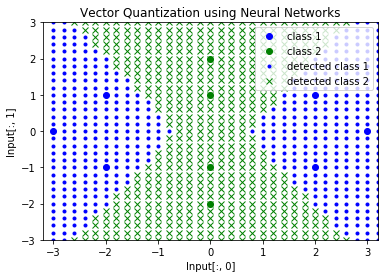

In [9]:
# Plot result
import pylab as pl

'''
# Other options for the color characters are:
 'r' = red
 'g' = green
 'b' = blue
 'c' = cyan
 'm' = magenta
 'y' = yellow
 'k' = black
 'w' = white

Options for line styles are

 '-' = solid
 '--' = dashed
 ':' = dotted
 '-.' = dot-dashed
 '.' = points
 'o' = filled circles
 '^' = filled triangles
 '''
pl.plot(class1[:,0], class1[:,1], 'bo', class2[:,0], 
        class2[:,1], 'go')

pl.plot(grid1[:,0], grid1[:,1], 'b.', grid2[:,0], 
        grid2[:,1], 'gx')

# X-axis range=(-3.2, 3.2)
# Y-axis range=(-3, 3)
pl.axis([-3.2, 3.2, -3, 3]) 

pl.xlabel('Input[:, 0]')
pl.ylabel('Input[:, 1]')
pl.legend(['class 1', 'class 2', 'detected class 1', 
           'detected class 2'])
pl.title('Vector Quantization using Neural Networks')

pl.show()

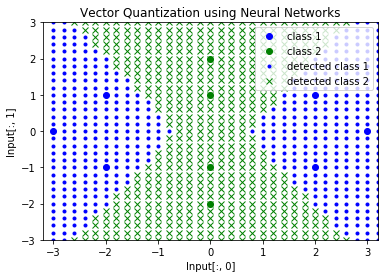

In [10]:
#ALTERNATIVE WAY
import matplotlib.pyplot as plt

plt.plot(class1[:,0], class1[:,1], 'bo', class2[:,0], class2[:,1], 'go')
plt.plot(grid1[:,0], grid1[:,1], 'b.', grid2[:,0], grid2[:,1], 'gx')
plt.axis([-3.2, 3.2, -3, 3])
plt.xlabel('Input[:, 0]')
plt.ylabel('Input[:, 1]')
plt.legend(['class 1', 'class 2', 'detected class 1', 'detected class 2'])
plt.title('Vector Quantization using Neural Networks')
plt.show()